In [62]:
SEED = 666

from random import normalvariate
from random import uniform
from math import sqrt

import seaborn as sns
from matplotlib import pyplot as plt

sns.set() # Setting seaborn as default style even if use only matplotlib
sns.set(rc={'figure.figsize':(20,15)})

In [82]:
def generate_dataset(n, x_min, x_max, slope, intercept, e_mean, e_std):
    """
    Generates a dataset according to the input parameters
    
    Keyword Arguments:
    n:            number of observations
    x_min, x_max: limits of the preditor's range (x_min <= x <= x_max)
    slope:        slope of the true linear model
    intercept:    intercept of the true linear model
    e_mean:       error term mean
    e_std:        error term standard deviation
    
    Output:
    X: predictor values
    Y: response values
    """
    
    X = [uniform(x_min,x_max) for _ in range(n)]
    Y = [intercept + slope * x + normalvariate(e_mean,e_std) for x in X]
    
    return X, Y
    
def mean(L):
    """Returns the mean of the elements of a list."""
    return sum(L)/len(L)

def linear_regression(X, Y):
    """
    Simple linear regression Y on X.
    
    Keyword Arguments:
    X: the predictor
    Y: the response
    
    Output:
    slope:        slope of the line of best fit
    intercept:    intercept of the line of best fit
    Y_pred:       model predictions for X
    RSS:          residual sum of squares of the model
    slope_SE:     standard error of the slope
    intercept_SE: standard error of the intercept
    slope_CI:     95% confidence interval of the slope
    intercept_CI: 95% condidence interval of the intercept
    t_statistic:  
    """
    
    n = len(X)
    X_mean, Y_mean = mean(X), mean(Y)
    
    slope_numerator   = sum([(x - X_mean) * (y - Y_mean) for x, y in zip(X,Y)])
    slope_denominator = sum([(x - X_mean)**2 for x in X])
    
    slope     = slope_numerator / slope_denominator
    intercept = Y_mean - slope * X_mean
    
    Y_pred = [intercept + slope * x for x in X]
    
    residuals = [y - y_pred for y, y_pred in zip(Y, Y_pred)]
    
    RSS = sum([(y - (intercept + slope * x))**2 for x, y in zip(X,Y)])
    RSE = sqrt(RSS / (n - 2))
    
    
    slope_SE     = sqrt((RSE**2) * ((1/n) + (X_mean**2 / slope_denominator)))
    intercept_SE = sqrt((RSE**2) / slope_denominator)
    
    slope_CI = [slope - 2 * slope_SE, slope + 2 * slope_SE]
    intercept_CI = [intercept - 2 * intercept_SE, intercept + 2 * intercept_SE]
    
    try:
        t_statistic = slope / slope_SE
    except:
        t_statistic = None # bug when slope_SE = 0
    
 
    return slope, intercept, Y_pred, residuals, RSS, slope_SE, intercept_SE, slope_CI, intercept_CI, t_statistic

In [83]:
print("""
NEXT FEATURES
refactor code -> from function to class

DONE
add residuals, Y_pred
add plots (data vs linear fit, residuals)
fix bug
""")


NEXT FEATURES
fix bug
refactor code -> from function to class

DONE
add residuals, Y_pred
add plots (data vs linear fit, residuals)



In [84]:
linear_regression([0,1,2,3,4],[1,3,5,7,9])

X, Y = generate_dataset(30,-10,10,1,0,0,0.5)

slope, intercept, Y_pred, residuals, RSS, slope_SE, intercept_SE, slope_CI, intercept_CI, t_statistic = linear_regression(X,Y)

<AxesSubplot:title={'center':'Residuals plot'}>

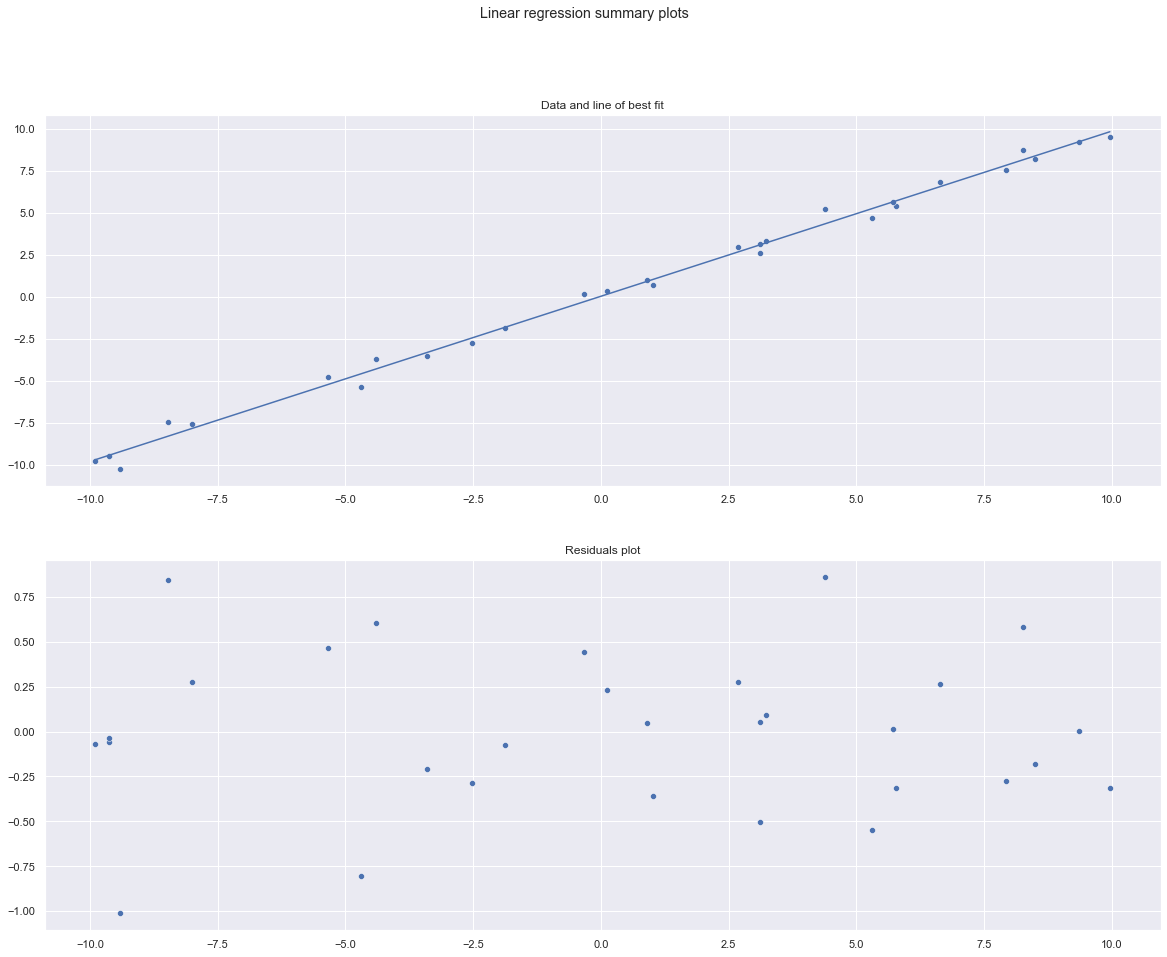

In [85]:
fig, axes = plt.subplots(2, 1)

fig.suptitle('Linear regression summary plots')
axes[0].set_title('Data and line of best fit')
axes[1].set_title('Residuals plot')

sns.scatterplot(ax = axes[0], x = X, y = Y)
sns.lineplot(ax = axes[0], x = X, y = Y_pred)
sns.scatterplot(ax = axes[1], x = X, y = residuals)

In [17]:
help(mean)
help(linear_regression)
help(generate_dataset)

Help on function mean in module __main__:

mean(L)
    Returns the mean of the elements of a list.

Help on function linear_regression in module __main__:

linear_regression(X, Y)
    Simple linear regression Y on X.
    
    Keyword Arguments:
    X: the predictor
    Y: the response
    
    Output:
    slope:        slope of the line of best fit
    intercept:    intercept of the line of best fit
    RSS:          residual sum of squares of the model
    slope_SE:     standard error of the slope
    intercept_SE: standard error of the intercept
    slope_CI:     95% confidence interval of the slope
    intercept_CI: 95% condidence interval of the intercept
    t_statistic:

Help on function generate_dataset in module __main__:

generate_dataset(n, x_min, x_max, slope, intercept, e_mean, e_std)
    Generates a dataset according to the input parameters
    
    Keyword Arguments:
    n:            number of observations
    x_min, x_max: limits of the preditor's range (x_min <= x <= x